# Linear Regression

<font color="blue"> Pragna Yelamanchili </font>

# Introduction

Objective of the assignment is to apply the Least Squares Model and the Least Mean Squares Model ot the data. Also we are supposed to Visualise the Data, and apply the algorithms to check which best suits the data. I also found the Root Mean Square Error to know which best works good.

# Data


## Dataset Details

Experimental data used to create regression models of appliances energy use in a low energy building. The data is recorded on an average of 10 minuites for 4.5 months. A ZigBee wireless sensor network was used to monitor the temperature and humidity conditions of the house. The wireless node transmitted the temperature and humidity conditions for 3.3 minuites, but later this was avaraged for 10 minuites periods. Two random variables have been included in the data set for testing the regression models and to filter out the non predective attributes.

** Below are the details of the Feature Values or Attributes present in the dataset **
1. Date: Date and timestamp
2. Appliances: Energy used by the appliances in Watt-Hours
3. Light: Energy Used by the light appliances in Watt-Hours
4. T1   : Temperature in kitchen area, in Celsius 
5. RH_1 : Humidity in kitchen area, in %
6. T2   : Temperature in living room area, in Celsius
7. RH_2 : Humidity in living room area, in % 
8. T3   : Temperature in laundry room area 
9. RH_3 : Humidity in laundry room area, in %
10. T4  : Temperature in office room, in Celsius 
11. RH_4: Humidity in office room, in % 
12. T5  : Temperature in bathroom, in Celsius
13. RH_5: Humidity in bathroom, in % 
14. T6  : Temperature outside the building (north side), in Celsius 
15. RH_6: Humidity outside the building (north side), in % 
16. T7  : Temperature in ironing room , in Celsius 
17. RH_7: Humidity in ironing room, in %
18. T8  : Temperature in teenager room 2, in Celsius 
19. RH_8: Temperature in teenager room 2, in Celsius 
20. T9  : Temperature in parents room, in Celsius
21. RH_9: Humidity in parents room, in % 
22. T_out: Temperature outside (from Chievres weather station), in Celsius
23. Press_mm_hg: Pressure (from Chievres weather station), in mm Hg 
24. RH_out: Humidity outside (from Chievres weather station), in %
25. Windspeed: (from Chievres weather station), in m/s 
26. Visibility:(from Chievres weather station), in km 
27. Tdewpoint: (from Chievres weather station), Â°C 
28. rv1:Random variable 1, nondimensional 
29. rv2:Random variable 2, nondimensional 

# Source of the Data
https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction#

# Reading the data and Preprocessing

In [1]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

#Reading the Data
data = pd.read_csv("energydata_complete.csv", nrows=12000)

#Data Preprocessing
data['date'] = pd.to_datetime(data['date'])
df = pd.DataFrame()
df['date'] = data.date
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['time'] = df.date.dt.time
df['month'].replace({1 : "January",2 : "February",3 : "March",4 : "April", 5 : "May", 6 : "June", 7 : "July",8 : "August",9 : "September",10 : "October",11 : "November",12 : "December"}, inplace=True)
result = pd.merge(data,
                 df[['date','year', 'month', 'time']],
                 on='date')
result.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,time
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,January,17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,January,17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,January,17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,2016,January,17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,January,17:40:00


# Visualizations and Preliminary Observations
Below are the visualizations and prelimnary observations for the data set:

# Box Plot

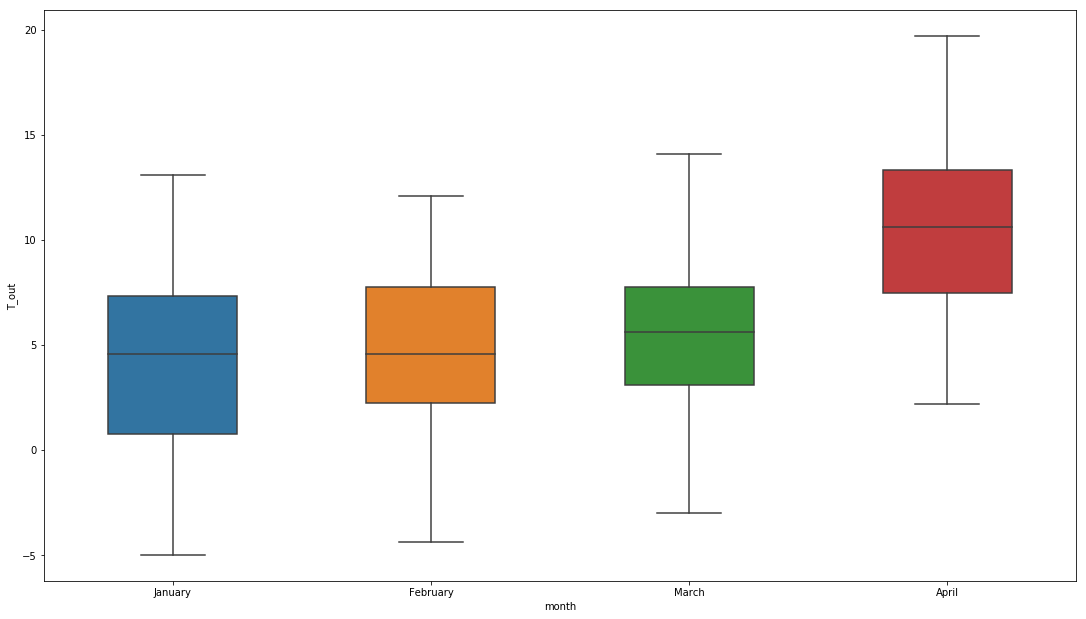

In [2]:
fig,axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(18.5, 10.5)
bplot = sns.boxplot(y='T_out', x='month', 
                 data=result, 
                 width=0.5)

The Box plot is marked between the Months and the T_out(Temperature outside the Chievres weather station ). The mean values were given as around 5 in the months of january and february. 6 in the month of March, arzound 8 in the April and 13 in May. There are outliers in the April month. 

# Correlation Matrix

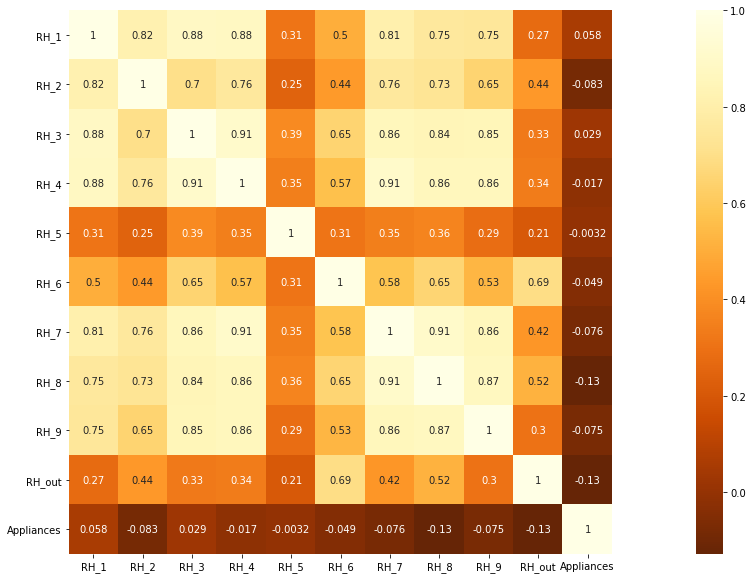

In [3]:
corrmatr = result[["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","RH_out","Appliances"]].corr()
corrmatr
#mask= np.zeros_like(corrmatr, dtype = np.bool)
#mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(30,10)
sns.heatmap(corrmatr,cmap="YlOrBr_r",vmax=1,square=True,annot=True)

A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable in the table is correlated with each of the other values in the table. This allows you to see which pairs have the highest correlation.
In this case the correlation matrix is plotted between the attribute humidity in all the rooms in the house that is RH_1,RH_2....,RH_9 and RH_out. By looking at the plot we can infer that the Correlation between RH_out and the other rooms is highest for RH6.

# Point Plot

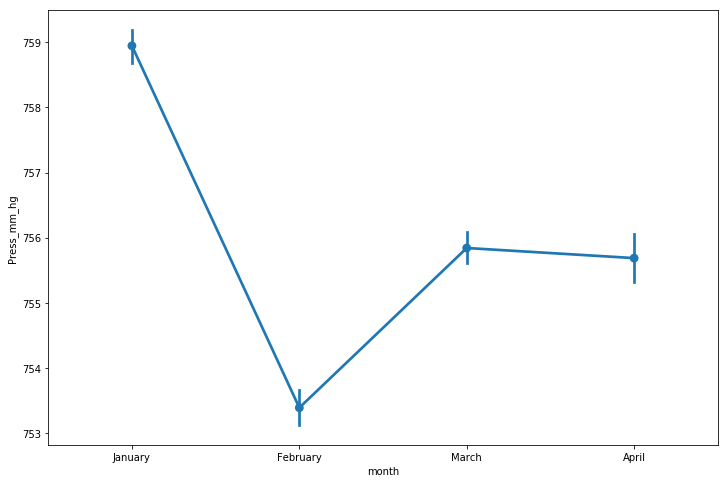

In [4]:
plt.subplots(figsize=(12,8))
sns.pointplot(data=result,x="month", y="Press_mm_hg")

This plot is marked between the Month on X-axis, and Pressure on the Y-axis. The Pressure measured in mm of Hg is variied a lot from the month of January to February. The pressure being almost the same in March and May. The highest being 759mm of Hg and the lowest being 753.5 mm of Hg.

# Bar Plot

Text(0,0.5,'Windspeed in m/s')

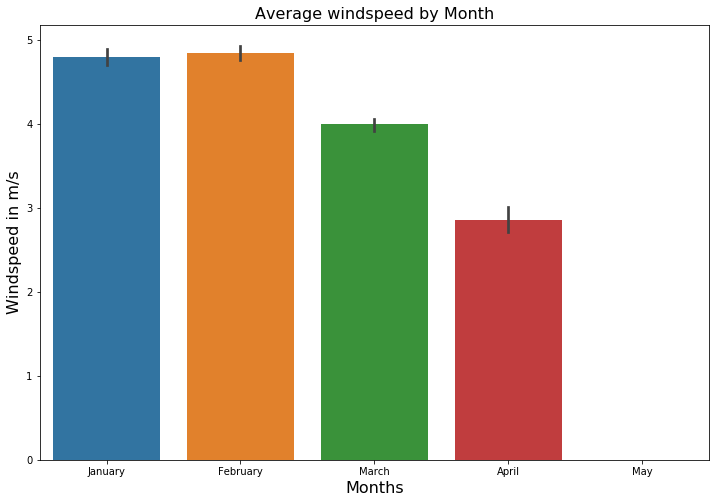

In [5]:
plt.subplots(figsize=(12,8))
sortmonth = ["January","February","March","April","May"]
sns.barplot(data=result,x="month",y="Windspeed", order=sortmonth)
plt.title("Average windspeed by Month", fontsize=16)
plt.xlabel("Months", fontsize=16)
plt.ylabel("Windspeed in m/s", fontsize=16)

This Plot represents the average windspeed in different months January, February,March,April and May. February being the highest and MAy being the lowest windspeeds.

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description

# Review of Models

# Linear Model

Linear model can be defined as a Euclidean dot product between two vectors: 


$$
\begin{align}
  f(x; w) &= w^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

where $w$ is a weight vector and $x$ is an input vector. 
When it is a one dimensional vector, it represents a straight line, so it is called *linear*. 

Assume that we have $N$ data observations, $x_i$ and target outputs, $t_i$, for $i = 1, \cdots, N$.
The simpliest model that we can think of is constant model, $f(x) = c$, where $c$ is any scalar. 
In this case, we have the zero weights in the linear model. 

The linearity in the parameter $x$ make the optimization based on deravatives to solvable analytically. 
The model limits the complexity so its representation is also limited. However, it can prevent possible overfitting with the simple modeling, especially when you have sparsely sampled data.

## Least Squares

The parameter that gives best fit will be

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

Since the error funciton is quadratic, the problem can be analytically solved by simply setting derivative with respect to $w$ to zero. 
For this, let us prepare data in matrix. 
The target values are collected in matrix $T$, and the input samples are in matrix $X$.

The error function is quadratic. Therefore, to get we can get the parameters giving minimum by taking the derivating of the function and setting it to 0. This derivation gives us following relation.

$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &= 0\\
\\
X^\top X w &= X^\top T\\
\\
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$


## Least Mean Square
The Least Square model uses entire dataset at one for training the model and finding the best weights. Even though it does well but it is often computationally costly, especially when we have large number of features and a very large training dataset.

In case of large dataset, *sequential* or *online* learning is preferred. In this method, the records of the dataset are fed to the training function one-by-one, which in turn update weights. Using the updated parameters, it makes a new estimation and repeat these steps. 

Initially the weight vector w is assigned with random values and it is updated as follows until convergence. 
When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This method is also called *stochastic gradient descent* or *sequential gradient descent*. 

For the $k$'th sample $x_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} &= \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 \\
        &= 2 \Big( f(x_k; w^{(k)}) - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( f(x_k; w^{(k)}) - t_k \Big) \\
        &= 2 \Big( {w^{(k)}}^\top x_k - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( {w^{(k)}}^\top x_k - t_k \Big) \\
        &= 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

### Super Classs Definition

In [6]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [7]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.inv(X.T @ X) @ X.T @ T     
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        return np.dot(X,self.w)


### Implementation
Implementation of this model is done in the LinearRegress class. The method "train" takes a feature matrix and reference values of the training set and apply the above relation to generate weights. The weights are stored in array "w".
The "use" method can be used to execute the trained model on the test dataset. It returns an array of projected results by performing dot product of weight vector (w) with features (X) of test dataset. 

### Least Mean Squares

In [8]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        
        for x, t in zip(X, T):
            self.train_step(x, t)
   
    
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        
        x = np.insert(x, 0, 1).reshape(-1, 1)
               
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
        
        self.w -= ((self.alpha)*((np.dot(self.w.T,x))-t)*(x))
            

    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        Y= self.w.T @ X.T
        return Y.T
        

#### Implementation
For implementation of Least Mean Square model, in the LMS class two methods are defined, "train" and "train_step".
* **train_step**: Train_step method takes a sample one by one from the training dataset and adjusts the weight vector
* **train**: The train method calls train_step method, for each record in the training set
* **use**: Use method is same as in the "LinearRegress" class

### Usage Examples

In [9]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

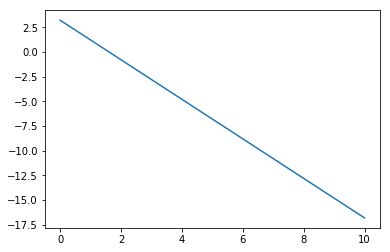

In [10]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

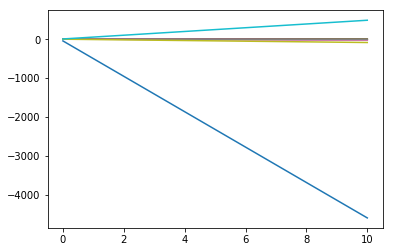

In [11]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

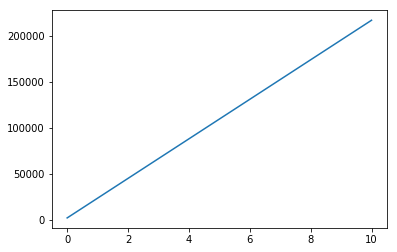

In [12]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply two methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


## Humidity Vs Energy Consumed by the Appliances

Here the humidity of all the rooms and also the humidity near the Chivlers station are considered as the independant variables. Depending on the humidity the energy consumed by the appliances is measured and is also considered as the target variable.

From the entire 10000 rows of data 40% is taken as the training data and the remaining 60% is taken as the test data. Also Root Mean Square Error(RMSE) is calculated for all three the methods. Based on the RMSE the best model for the data is analysed.

# Partion of the data

In [13]:
train_data = result[:40]
test_data = result[60:]

# Visualization of the Results

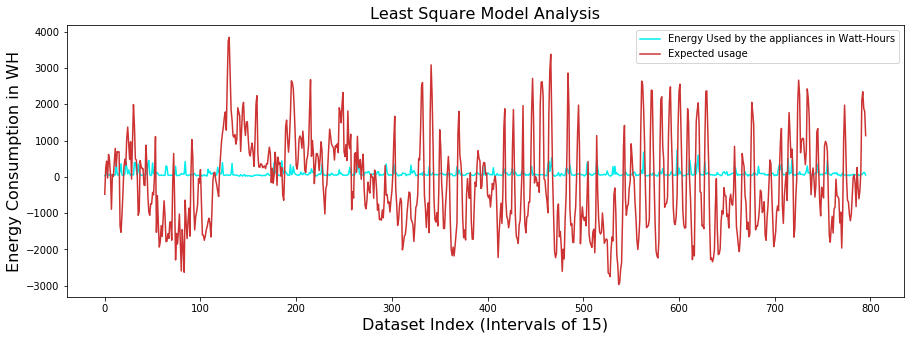

The root mean square error is: 35.72270641773568


In [14]:
#Least Square Model
ls=LinearRegress()
ls.train (train_data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out','lights']].values, train_data['Appliances'].values.reshape(-1,1))
T = ls.use (test_data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out','lights']].values)

plt.figure(figsize=(15,5))
plt.title('Least Square Model Analysis', fontsize=16)
plt.plot(test_data['Appliances'].values[0::15], label='Energy Used by the appliances in Watt-Hours',color = '#00EEEE')
plt.plot(T[0::15], label='Expected usage',color = '#CD3333')
plt.xlabel('Dataset Index (Intervals of 15)', fontsize=16)
plt.ylabel('Energy Consumption in WH', fontsize=16)
plt.legend()
plt.show()

#Calculation of Root Mean Square Error
rms_error = np.sqrt(((test_data['Appliances'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(math.sqrt(rms_error)))

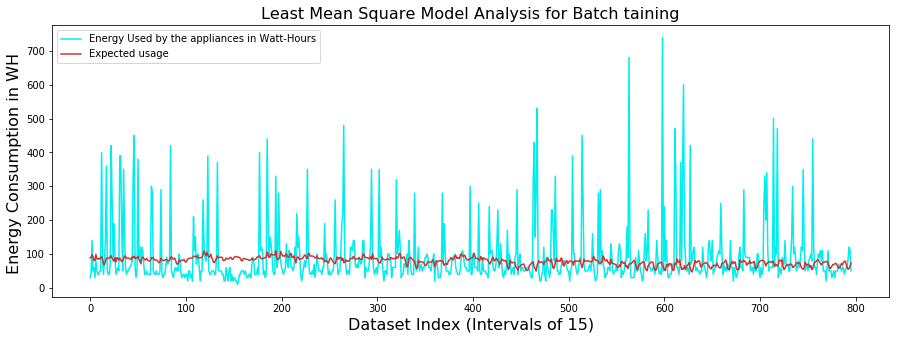

The root mean square error is: 10.355543526204857


In [15]:
# Least Mean Square Model for batch
lms = LMS(0.00001)

lms.train (train_data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out','lights']].values, train_data['Appliances'].values.reshape(-1,1))
T = lms.use (test_data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out','lights']].values)

                 
plt.figure(figsize=(15,5))
plt.title('Least Mean Square Model Analysis for Batch taining', fontsize=16)
plt.plot(test_data['Appliances'].values[0::15], label='Energy Used by the appliances in Watt-Hours',color = '#00EEEE')
plt.plot(T[0::15], label='Expected usage',color = '#CD3333')
plt.xlabel('Dataset Index (Intervals of 15)', fontsize=16)
plt.ylabel('Energy Consumption in WH ', fontsize=16)
plt.legend()
plt.show()

#Calculation of Root Mean Square Error
rms_error = np.sqrt(((test_data['Appliances'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(math.sqrt(rms_error)))


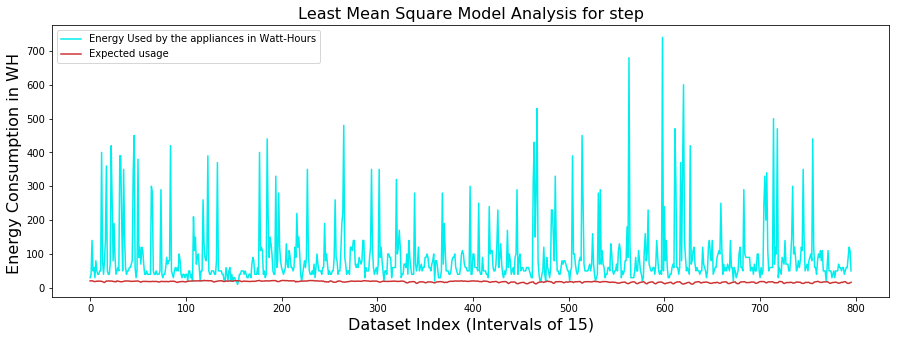

The root mean square error is: 11.471820519472828


In [16]:
# Least Mean Square Model for Step 
lms = LMS(0.00001)
lms.train_step(train_data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']].values[0], train_data['Appliances'].values.reshape(-1,1)[0])

T = lms.use(test_data[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','RH_out']].values)
                    
plt.figure(figsize=(15,5))
plt.title('Least Mean Square Model Analysis for step', fontsize=16)
plt.plot(test_data['Appliances'].values[0::15], label='Energy Used by the appliances in Watt-Hours', color = '#00EEEE')
plt.plot(T[0::15], label='Expected usage',color = '#CD3333')
plt.xlabel('Dataset Index (Intervals of 15)', fontsize=16)
plt.ylabel('Energy Consumption in WH ', fontsize=16)
plt.legend()
plt.show()

#Calculation of Root Mean Square Error
rms_error = np.sqrt(((test_data['Appliances'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(math.sqrt(rms_error)))

# Analysis of the Algorithms

From the above graphs plotted, we can say the best fit would be the Least mean square model for the considered data. When we calculated the root mean square error value, RMSE for LMS was lower than the RMSE for LS. The expected graph is too much distorted from the data considered in the case of LS, where as, for LMS the entire data is considered and the overlapping of the target data is higher on the original data.

# Conclusions

* Helped me understand Least Square and Least Mean Square models
* Pre-processing of data.
* Converting datetypes into appropriate datatype before plotting.
* Finding an appropriate visualization plot for the given set of attributes

# References

1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://python-graph-gallery.com/seaborn/
3. https://seaborn.pydata.org/examples/index.html
4. http://www.scipy-lectures.org/intro/matplotlib/index.html
5. https://seaborn.pydata.org/generated/seaborn.countplot.html

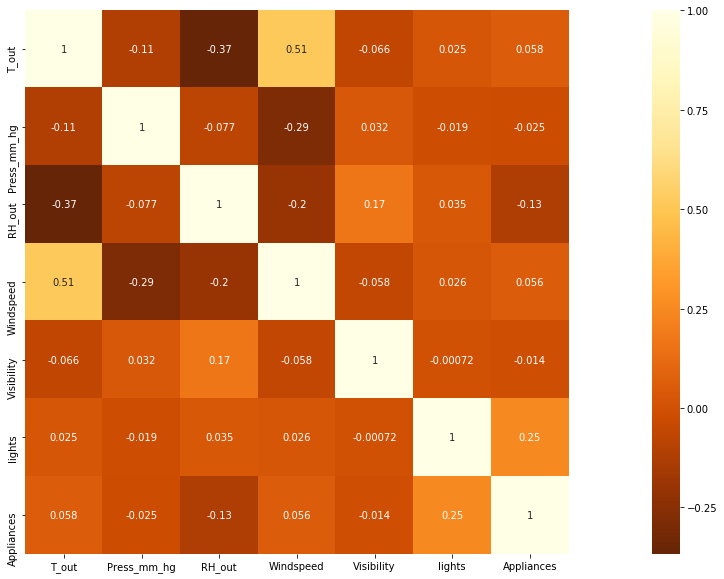

In [17]:
corrmatr = result[["T_out","Press_mm_hg","RH_out","Windspeed","Visibility","lights","Appliances"]].corr()
corrmatr
#mask= np.zeros_like(corrmatr, dtype = np.bool)
#mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(30,10)
sns.heatmap(corrmatr,cmap="YlOrBr_r",vmax=1,square=True,annot=True)

Appliances is the dependant variable. 
* From the above correlation matrix, the most significant features are: Lights and RH_out
* From the above correlation matrix, the least significant features are: Visibility, Press_mm_hg, Windspeed

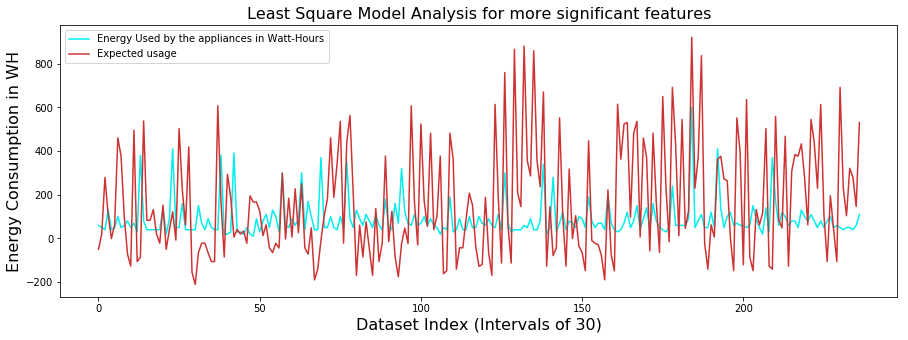

In [18]:
# Plot for most significant features
ls=LinearRegress()
ls.train (train_data[['lights','RH_out']].values, train_data['Appliances'].values.reshape(-1,1))

T = ls.use (test_data[['lights','RH_out']].values)

plt.figure(figsize=(15,5))
plt.title('Least Square Model Analysis for more significant features', fontsize=16)
plt.plot(test_data['Appliances'].values[100::50], label='Energy Used by the appliances in Watt-Hours',color = '#00EEEE')
plt.plot(T[100::50], label='Expected usage',color = '#CD3333')
plt.xlabel('Dataset Index (Intervals of 30)', fontsize=16)
plt.ylabel('Energy Consumption in WH', fontsize=16)
plt.legend()
plt.show()

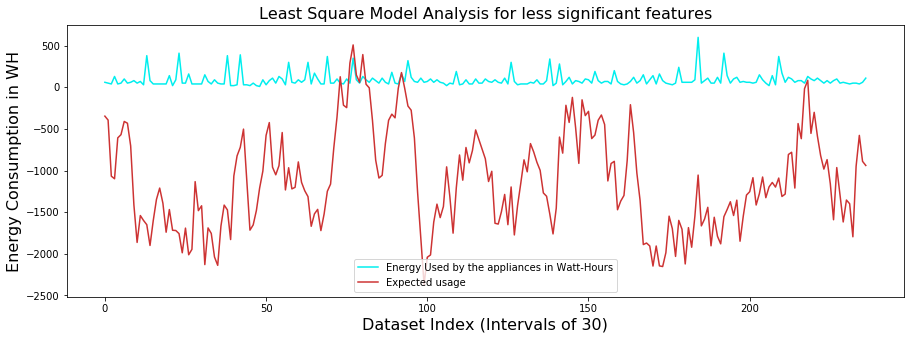

In [19]:
ls=LinearRegress()
ls.train (train_data[['Visibility','Press_mm_hg','Windspeed']].values, train_data['Appliances'].values.reshape(-1,1))

T = ls.use (test_data[['Visibility','Press_mm_hg','Windspeed']].values)

plt.figure(figsize=(15,5))
plt.title('Least Square Model Analysis for less significant features', fontsize=16)
plt.plot(test_data['Appliances'].values[100::50], label='Energy Used by the appliances in Watt-Hours',color = '#00EEEE')
plt.plot(T[100::50], label='Expected usage',color = '#CD3333')
plt.xlabel('Dataset Index (Intervals of 30)', fontsize=16)
plt.ylabel('Energy Consumption in WH', fontsize=16)
plt.legend()
plt.show()

#  Observation
From the above plots, we can observe that, the Least square fits the data the most significant features, and for the least significant features, the target vali=ue is diverged form the test data.

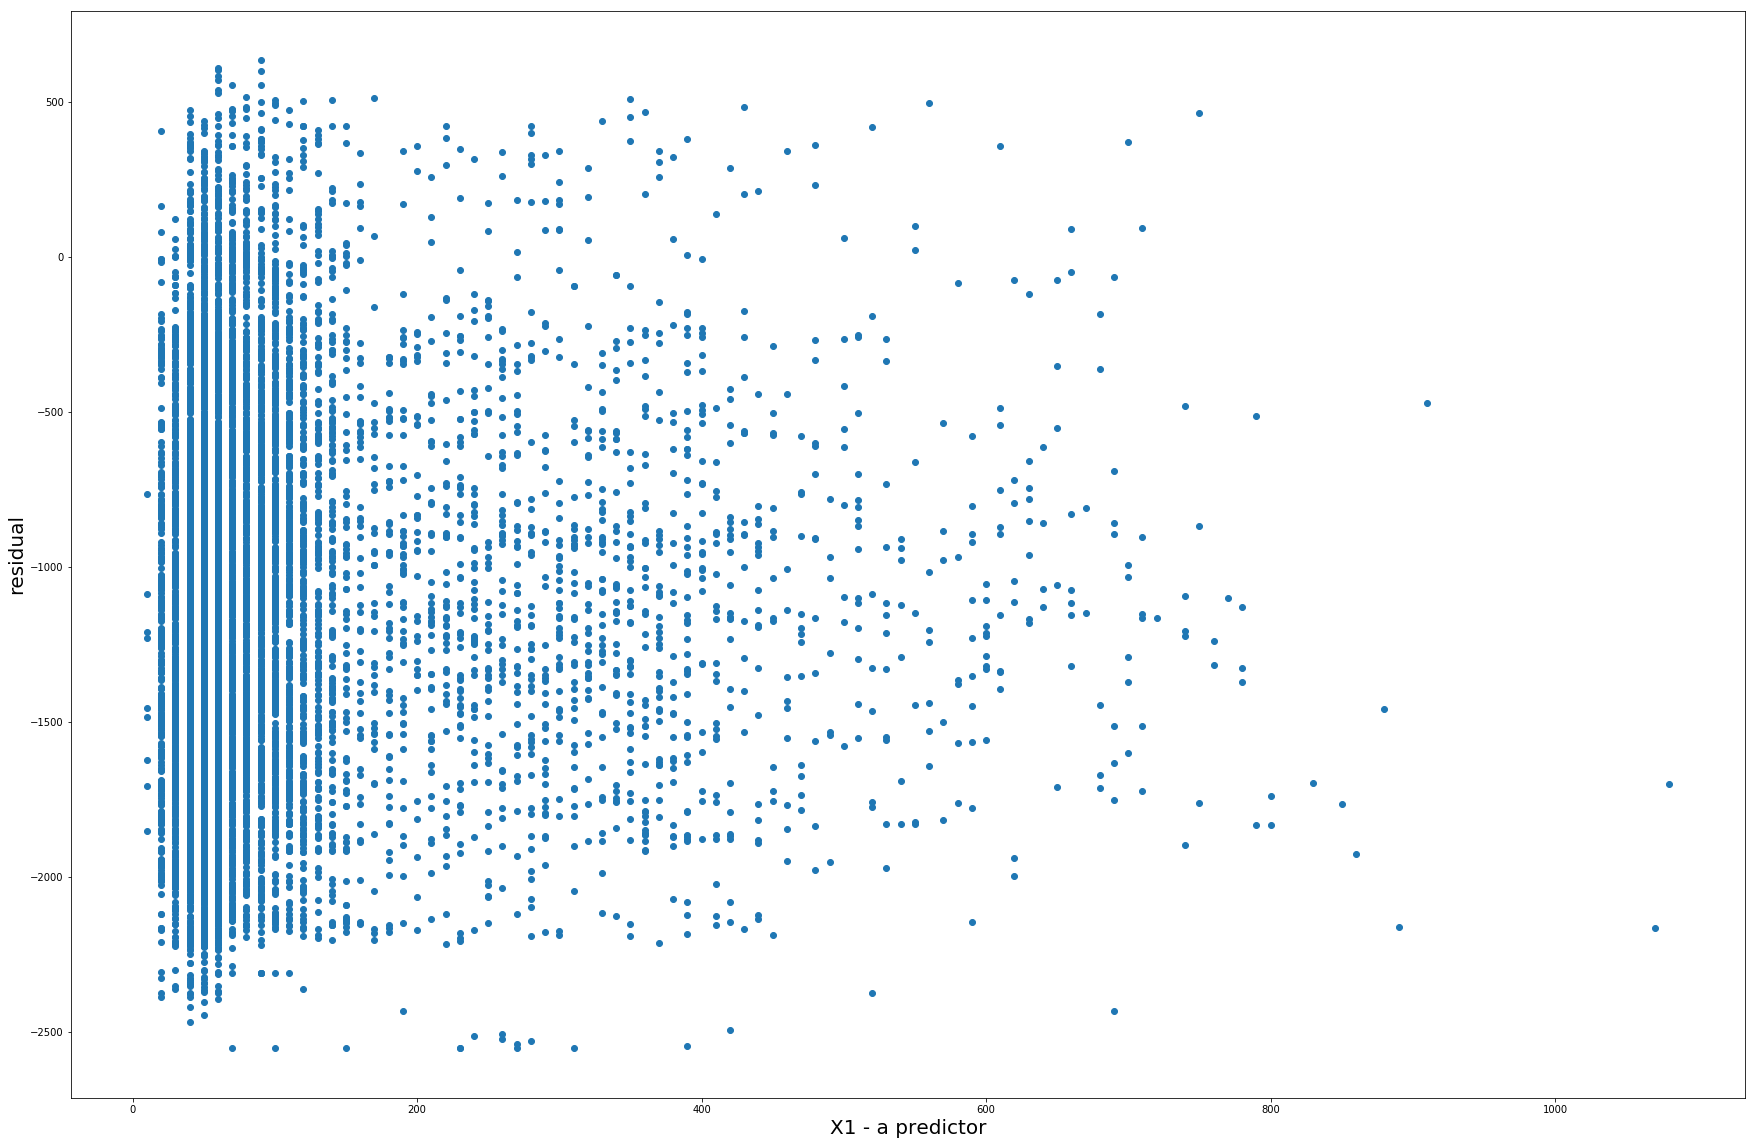

array([[-228.87878997],
       [-206.96901376],
       [-185.05923193],
       ...,
       [-617.35181462],
       [-596.4295568 ],
       [-575.50730441]])

In [20]:
ls=LinearRegress()
ls.train (train_data[['Visibility','Press_mm_hg','Windspeed']].values, train_data['Appliances'].values.reshape(-1,1))

T = ls.use (test_data[['Visibility','Press_mm_hg','Windspeed']].values)
plt.figure(figsize=(30,20))
plt.scatter(test_data['Appliances'],T)
plt.xlabel("X1 - a predictor", fontsize = 20)
plt.ylabel("residual",fontsize = 20)
plt.show()
T

# Preliminary Test

In [21]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
